In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import healpy as hp
from tqdm import tqdm
import pickle as pl
sys.path.append('../')
import os
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Sky
from dance.qe import Reconstruct
from dance.delens import Delens

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE_debug'

In [41]:
recon_aa = Reconstruct(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=1024,lmax_qlm=1024,qe_key='a_p',verbose=1)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected


CMB : INFO - Loading CMB power spectra from file


In [31]:
qml0 = recon_aa.get_qlm_recon(0)
qml1 = recon_aa.get_qlm_recon(1)

In [5]:
delens_aa = Delens(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key='p_p',verbose=1,special_case=True)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


Caching sky fractions...


CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [6]:
recon_aa_d = Reconstruct(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=1024,lmax_qlm=1024,qe_key='a_p',verbose=1,delens=delens_aa)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


Delens Filtering


In [33]:
qcl_d = recon_aa_d.get_qcl(0,)

In [34]:
qcl = recon_aa.get_qcl(0)

In [35]:
t = recon_aa.wf.mysims.sky.cmb.cl_aa()

(1e-12, 0.0001)

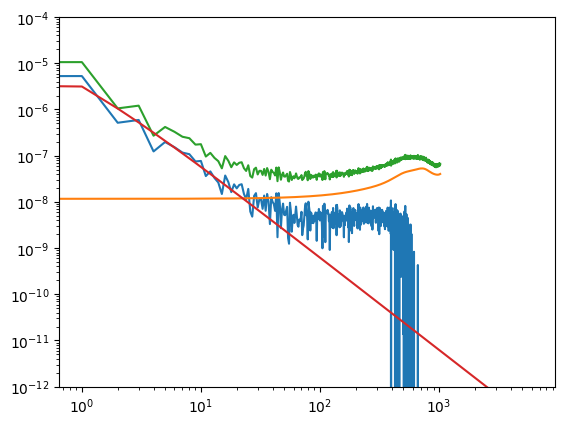

In [39]:
plt.loglog(qcl,label='lensed')
plt.loglog(recon_aa.get_n0(0))
plt.loglog(hp.alm2cl(qml0, qml0)*2)
plt.loglog(t)
plt.ylim(1e-12,1e-4)

(2, 1024)

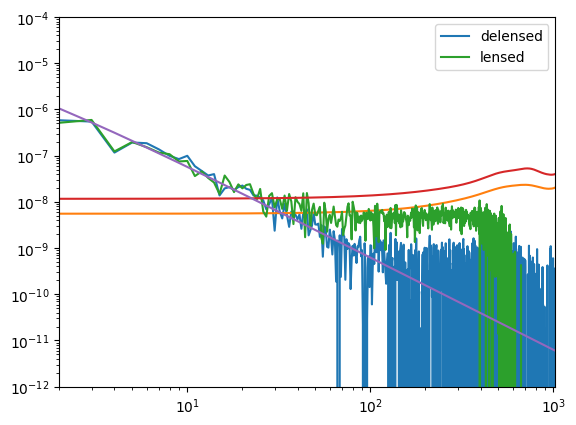

In [20]:
plt.loglog(qcl_d,label='delensed')
plt.loglog(recon_aa_d.get_n0(0))
plt.loglog(qcl,label='lensed')
plt.loglog(recon_aa.get_n0(0))
plt.loglog(t)
plt.legend()
plt.ylim(1e-12,1e-4)
plt.xlim(2,1024)

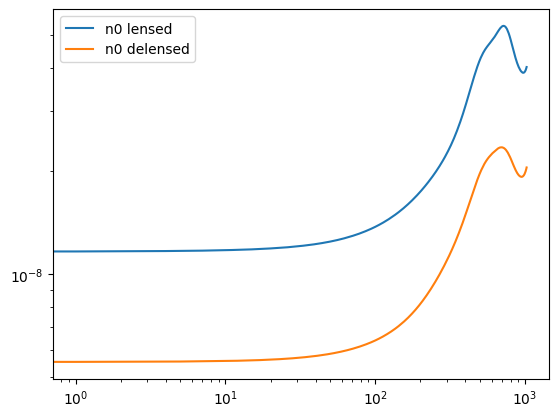

In [11]:
plt.loglog(recon_aa.get_n0(0),label='n0 lensed')
plt.loglog(recon_aa_d.get_n0(0),label='n0 delensed')
plt.legend()

/tmp/ipykernel_813883/1086071260.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1024)


(0.6465185261832656, 1024)

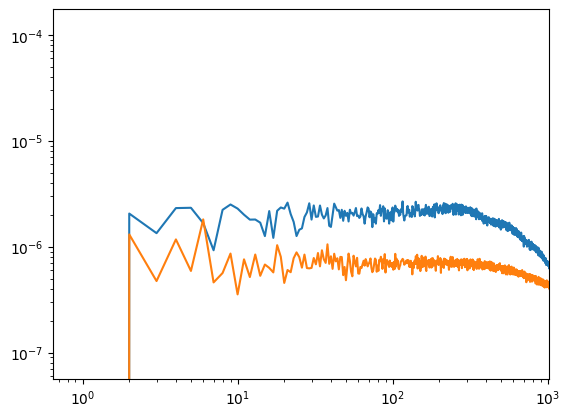

In [12]:
plt.loglog(hp.alm2cl(recon_aa.wf.mysims.get_sim_blm(0)),label='E lensed')
plt.loglog(hp.alm2cl(recon_aa_d.wf.mysims.get_sim_blm(0)),label='E delensed')
plt.xlim(0,1024)


In [26]:
model = 'iso_A'

len(model.split('_'))

2

In [27]:
Acb = 1e-6

In [28]:
if Acb != 0:
    print('Acb is not zero')
else:
    print('Acb is zero')

Acb is not zero
